In [9]:
#Busca dados de ações no yahoo finance e realiza calculo de beta

In [2]:
! pip install yfinance
! pip install pandas-datareader

import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import yfinance as yf 
yf.pdr_override() 
sns.set()

  Stored in directory: /home/jupyterlab/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/37/fa/73/d492849e319038eb4d986f5152e4b19ffb1bc0639da84d2677
Successfully built yfinance multitasking
     |████████████████████████████████| 112kB 5.4MB/s eta 0:00:01
     |████████████████████████████████| 5.5MB 6.0MB/s eta 0:00:01


In [3]:
stock =['MOVI3.SA', 'TRIS3.SA', 'CNTO3.SA','^BVSP','CAML3.SA','PRIO3.SA','VALE3.SA','MGLU3.SA','ENAT3.SA','PETR3.SA']
start = pd.to_datetime('2020-03-15') 
end = pd.to_datetime('2020-07-10')
data = pdr.get_data_yahoo(stock, start=start, end=end)['Adj Close']
complete_data = pdr.get_data_yahoo(stock, start=start, end=end)
daily_returns = (data/data.shift(1))-1
returns = np.log(data/data.shift(1))

[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  10 of 10 completed


In [4]:
cov = daily_returns.cov()*250
cov

,CAML3.SA,CNTO3.SA,ENAT3.SA,MGLU3.SA,MOVI3.SA,PETR3.SA,PRIO3.SA,TRIS3.SA,VALE3.SA,^BVSP
CAML3.SA,0.207969,0.063422,0.053174,0.076563,0.083615,0.072935,0.032546,0.057655,0.072955,0.080463
CNTO3.SA,0.063422,1.252478,0.525551,0.533980,0.692148,0.478265,0.910250,0.904565,0.157717,0.368194
ENAT3.SA,0.053174,0.525551,0.749956,0.206980,0.440373,0.340581,0.625870,0.544347,0.062358,0.195613
MGLU3.SA,0.076563,0.533980,0.206980,0.553936,0.368433,0.256582,0.402303,0.490168,0.139018,0.229061
MOVI3.SA,0.083615,0.692148,0.440373,0.368433,0.850066,0.384443,0.749423,0.762291,0.145594,0.325398
PETR3.SA,0.072935,0.478265,0.340581,0.256582,0.384443,0.526646,0.635261,0.486659,0.195967,0.273140
PRIO3.SA,0.032546,0.910250,0.625870,0.402303,0.749423,0.635261,1.646211,0.727045,0.242332,0.394999
TRIS3.SA,0.057655,0.904565,0.544347,0.490168,0.762291,0.486659,0.727045,1.255176,0.097167,0.361986
VALE3.SA,0.072955,0.157717,0.062358,0.139018,0.145594,0.195967,0.242332,0.097167,0.242264,0.154123
^BVSP,0.080463,0.368194,0.195613,0.229061,0.325398,0.273140,0.394999,0.361986,0.154123,0.218715


In [5]:
#SEMPRE TRAVAR A COLUNA QUE O IBOVESPA ESTIVER
cov_mercado = cov.iloc[9,:]
cov_mercado

CAML3.SA    0.080463
CNTO3.SA    0.368194
ENAT3.SA    0.195613
MGLU3.SA    0.229061
MOVI3.SA    0.325398
PETR3.SA    0.273140
PRIO3.SA    0.394999
TRIS3.SA    0.361986
VALE3.SA    0.154123
^BVSP       0.218715
Name: ^BVSP, dtype: float64

In [6]:
var_mercado = daily_returns['^BVSP'].var()*250
var_mercado

0.21871461605915812

In [7]:
beta_acao = cov_mercado / var_mercado
beta_acao

CAML3.SA    0.367888
CNTO3.SA    1.683445
ENAT3.SA    0.894378
MGLU3.SA    1.047305
MOVI3.SA    1.487773
PETR3.SA    1.248842
PRIO3.SA    1.806003
TRIS3.SA    1.655059
VALE3.SA    0.704677
^BVSP       1.000000
Name: ^BVSP, dtype: float64

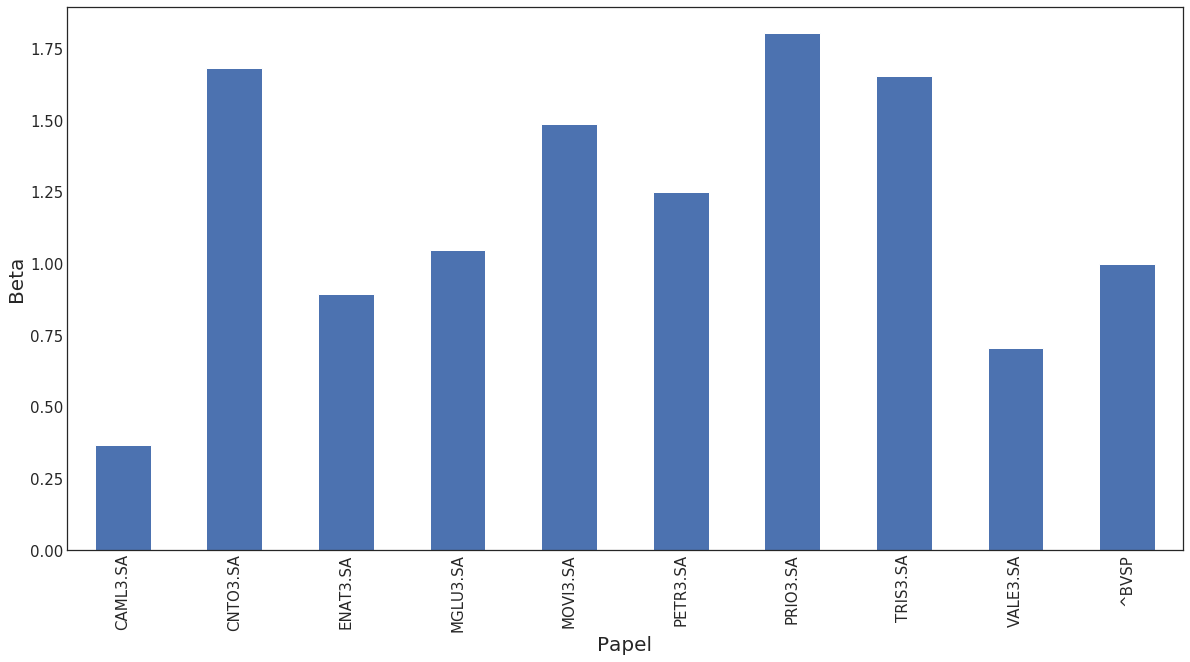

In [8]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.figure(figsize=(20,10))
plt.xlabel('Papel', fontsize=20)
plt.ylabel('Beta', fontsize=20)
beta_acao.plot.bar(fontsize=15)
